# ME460 Linkages - Prof. Mark Ganter
# 5 position function generator via characteristic equations
# dyad-standard  equations (r1+r5=r3 form)

posl2= d1*(-0.0341 - 0.259*I)*exp(I*t1) + d5*(exp(I*g2) - 1.0)*exp(I*t5) - 0.285 - 0.199*I
posl3= d1*(-0.134 - 0.5*I)*exp(I*t1) + d5*(exp(I*g3) - 1.0)*exp(I*t5) - 0.534 - 0.278*I
posl4= d1*(-0.293 - 0.707*I)*exp(I*t1) + d5*(exp(I*g4) - 1.0)*exp(I*t5) - 0.794 - 0.289*I
posl5= d1*(-0.485 - 0.857*I)*exp(I*t1) + d5*(exp(I*g5) - 1.0)*exp(I*t5) - 0.966 - 0.259*I

char. equations
left char solution g2-g4 350.72760631046503 342.0494105485685 333.6130922798539 326.378663884197
abs(det234)= 0.000393726156371020
abs(det245)= 0.000628789470855313

posl2= d1*(-0.0341 - 0.259*I)*exp(I*t1) + d5*(-0.0131 - 0.161*I)*exp(I*t5) - 0.285 - 0.199*I
posl3= d1*(-0.134 - 0.5*I)*exp(I*t1) + d5*(-0.0487 - 0.308*I)*exp(I*t5) - 0.534 - 0.278*I
posl4= d1*(-0.293 - 0.707*I)*exp(I*t1) + d5*(-0.104 - 0.444*I)*exp(I*t5) - 0.794 - 0.289*I
posl5= d1*(-0.485 - 0.857*I)*exp(I*t1) + d5*(-0.167 - 0.554*I)*exp(I*t5) - 0.966 - 0.259*I

left 3pos solution r1,t1,r5,t5 = -1.38576624801788 241.38464896099805 2.47897579697478 186.9

<IPython.core.display.Javascript object>


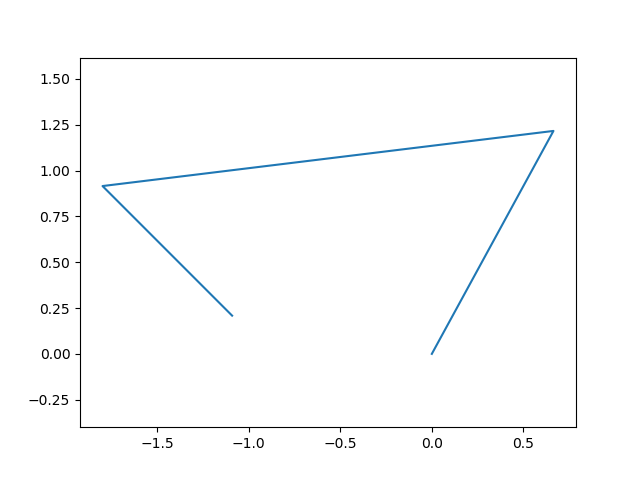

In [7]:
%matplotlib notebook
# this command tells notebook to display plots in the notebook
from math import *
from sympy import *
import numpy as np
import random

import matplotlib
import matplotlib.pyplot as plt

#define random angle function
def randang():
   return(2*np.pi*random.random())

d1,t1 = symbols("d1 t1", real=True)
d5,t5= symbols("d5 t5", real=True)
g2,g3,g4,g5 = symbols("g2 g3 g4 g5", real=True)
#s2,s3,s4 = symbols("s2 s3 s4",real=True)

r1 = d1*exp(I*t1)
r5 = d5*exp(I*t5)

# inputs phi's and psi's
p2 = radians(-15)
p3 = radians(-30)
p4 = radians(-45)
p5 = radians(-59)

s2 = radians(-20)
s3 = radians(-35)
s4 = radians(-50)
s5 = radians(-60)

# free choices gamma's 
# note: for 5 position there is no free choice for gamma.


# for r3 you only need to choose the angle as the length is always 1.0
r3 = 1.0*exp(I*radians(135.0))

#compute deltas
del2 = r3*(exp(I*s2)-1)
del3 = r3*(exp(I*s3)-1)
del4 = r3*(exp(I*s4)-1)
del5 = r3*(exp(I*s5)-1)

#write out the dyad-standard equations for left side of linkage 
posl2 = r1*(exp(I*p2)-1) + r5*(exp(I*g2)-1) - del2
posl3 = r1*(exp(I*p3)-1) + r5*(exp(I*g3)-1) - del3
posl4 = r1*(exp(I*p4)-1) + r5*(exp(I*g4)-1) - del4
posl5 = r1*(exp(I*p5)-1) + r5*(exp(I*g5)-1) - del5


print("posl2=",N(posl2,3))
print("posl3=",N(posl3,3))
print("posl4=",N(posl4,3))
print("posl5=",N(posl5,3))
print()

# characteristic polynomial approach

leftside234 = Matrix([[(exp(I*p2)-1),(exp(I*g2)-1),del2],[(exp(I*p3)-1),(exp(I*g3)-1),del3],
                      [(exp(I*p4)-1),(exp(I*g4)-1),del4]])
detleft234 = leftside234.det()

leftside245 = Matrix([[(exp(I*p2)-1),(exp(I*g2)-1),del2],[(exp(I*p4)-1),(exp(I*g4)-1),del4],
                      [(exp(I*p5)-1),(exp(I*g5)-1),del5]])
detleft245 = leftside245.det()

print("char. equations")
#print("detleft234=",detleft234)
#print()
#print("detleft245=",detleft245)


#next solve left characteristic equation for g3 and g4
ans = nsolve((re(detleft234),im(detleft234),re(detleft245),im(detleft245)), (g2,g3,g4,g5), 
             (randang(),randang(),randang(),randang()), 
#             (radians(-20),radians(-40),radians(-60),radians(-80)),
            maxsteps=100, tol=1.0e-3, verify=false)  #, verbose=true )

print("left char solution g2-g4",degrees(ans[0])%360,degrees(ans[1])%360,degrees(ans[2])%360,degrees(ans[3])%360)
print ("abs(det234)=",abs(detleft234.evalf(subs={g2:ans[0],g3:ans[1],g4:ans[2],g5:ans[3]}) ))
print ("abs(det245)=",abs(detleft245.evalf(subs={g2:ans[0],g3:ans[1],g4:ans[2],g5:ans[3]}) ))
print()

# now plug in results from left characteristic equation into pos. 3 & pos. 4 dyad equation and solve
pos2a = posl2.subs(g2,ans[0])
pos3a = posl3.subs(g3,ans[1])
pos4a = posl4.subs(g4,ans[2])
pos5a = posl5.subs(g5,ans[3])

# set g's before information is overwritten
g2a = ans[0]
g3a = ans[1]
g4a = ans[2]
g5a = ans[3]

# LEFT SIDE #

#write out the dyad-standard equations for linkage solution
posl2 = r1*(exp(I*p2)-1) + r5*(exp(I*g2a)-1) - del2
posl3 = r1*(exp(I*p3)-1) + r5*(exp(I*g3a)-1) - del3
posl4 = r1*(exp(I*p4)-1) + r5*(exp(I*g4a)-1) - del4
posl5 = r1*(exp(I*p5)-1) + r5*(exp(I*g5a)-1) - del5

print("posl2=",N(posl2,3))
print("posl3=",N(posl3,3))
print("posl4=",N(posl4,3))
print("posl5=",N(posl5,3))
print()

#currently this solution is over-constrained!  All of dyad-standard eq's are used.
ansl = nsolve((re(posl4),im(posl4),re(posl3),im(posl3),re(posl5),im(posl5),re(posl2),im(posl2)), 
            (d1, t1, d5, t5), 
            (5.0*random.random(),randang(),5.0*random.random() ,randang()), 
            maxsteps=200, tol=1.0e-3, verify=false)

print("left 3pos solution r1,t1,r5,t5 =",ansl[0],degrees(ansl[1]),ansl[2],degrees(ansl[3]))
print ("abs(posl2)=",N(abs(posl2.evalf(subs={d1:ansl[0],t1:ansl[1],d5:ansl[2],t5:ansl[3]}) ),3))
print ("abs(posl3)=",N(abs(posl3.evalf(subs={d1:ansl[0],t1:ansl[1],d5:ansl[2],t5:ansl[3]}) ),3))
print ("abs(posl4)=",N(abs(posl4.evalf(subs={d1:ansl[0],t1:ansl[1],d5:ansl[2],t5:ansl[3]}) ),3))
print ("abs(posl5)=",N(abs(posl5.evalf(subs={d1:ansl[0],t1:ansl[1],d5:ansl[2],t5:ansl[3]}) ),3))
print()


# RIGHT SIDE #
# there is only one side -- the left for function generators


evalr1 = N(r1.evalf(subs={d1:ansl[0],t1:ansl[1]}),3)
evalr3 = N(r3,3)
evalr5 = N(r5.evalf(subs={d5:ansl[2],t5:ansl[3]}),3)
evalr6 = evalr1+evalr5-evalr3

print("phi2 =",degrees(p2),"phi3 =",degrees(p3),"phi4 =",degrees(p4),"phi5 =",degrees(p5))
print("psi2 =",degrees(s2),"psi3 =",degrees(s3),"psi4 =",degrees(s4),"psi5 =",degrees(s5))
print("gamma2 =",degrees(g2a),"gamma3 =",degrees(g3a),"gamma4 =",degrees(g4a),"gamma5 =",degrees(g5a))
print("del2 =",N(del2.evalf(),3))
print("del3 =",N(del3.evalf(),3))
print("del4 =",N(del4.evalf(),3))
print("del5 =",N(del5.evalf(),3))
print()

print("R1 = (",evalr1,")  (", abs(evalr1),"@",degrees(arg(evalr1)),"degs)")
print("R3 = (",evalr3,")  (", abs(evalr3),"@",degrees(arg(evalr3)),"degs)")
print("R5 = (",evalr5,")  (", abs(evalr5),"@",degrees(arg(evalr5)),"degs)")
print("R6 = (",evalr6,")  (", abs(evalr6),"@",degrees(arg(evalr6)),"degs)")
print()
lmx = max(abs(evalr1),abs(evalr3),abs(evalr5),abs(evalr6))
lmn = min(abs(evalr1),abs(evalr3),abs(evalr5),abs(evalr6))
if (lmx+lmn)<(abs(evalr1)+abs(evalr3)+abs(evalr5)+abs(evalr6)-lmx-lmn):
    print ("Grashof=true")
else:
    print ("Grashof=false")
print()
evalOa = 0
evalA = evalr1
evalB = evalr1+evalr5
evalOb = evalr1+evalr5-evalr3
print("Oa = ( 0 + I*0 )")
print("A = (",evalA,")")
print("B = (",evalB,")")
print("Ob = (",evalOb,")")

# call matplotlib routines for a scatter plot    
plt.plot([0,re(evalA),re(evalB),re(evalOb)], 
        [0,im(evalA),im(evalB),im(evalOb)])
plt.axes().set_aspect('equal', 'datalim')
plt.show()

